In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/scrubber_customers.csv')

In [3]:
df.head()

,location_type,industry_hint,business_size,cleaning_needs_m2,budget_eur,prior_cleaning_machine,usage_frequency,dirt_type,eco_preference,price_sensitivity,customer_segment
0,urban,horeca,61,4753,3501,nu,zilnic,medie,nu,scazut,horeca
1,rural,retail,29,4309,1635,da,zilnic,usoara,da,scazut,firma_curatenie
2,periurban,industrial,468,90393,4480,nu,saptamanal,usoara,nu,ridicat,firma_curatenie
3,urban,firm_curatenie,117,4630,300,da,zilnic,medie,nu,mediu,firma_curatenie
4,urban,retail,7,372,1244,da,lunar,medie,nu,ridicat,horeca


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   location_type           3500 non-null   object
 1   industry_hint           3500 non-null   object
 2   business_size           3500 non-null   int64 
 3   cleaning_needs_m2       3500 non-null   int64 
 4   budget_eur              3500 non-null   int64 
 5   prior_cleaning_machine  3500 non-null   object
 6   usage_frequency         3500 non-null   object
 7   dirt_type               3500 non-null   object
 8   eco_preference          3500 non-null   object
 9   price_sensitivity       3500 non-null   object
 10  customer_segment        3500 non-null   object
dtypes: int64(3), object(8)
memory usage: 300.9+ KB


In [5]:
df.describe()

,business_size,cleaning_needs_m2,budget_eur
count,3500.000000,3500.000000,3500.000000
mean,76.463714,8109.716571,2066.496000
std,91.029786,11849.881870,1937.090638
min,1.000000,10.000000,50.000000
25%,5.000000,517.750000,256.000000
50%,53.000000,3814.000000,1814.500000
75%,112.000000,11346.750000,3151.750000
max,498.000000,94311.000000,13104.000000


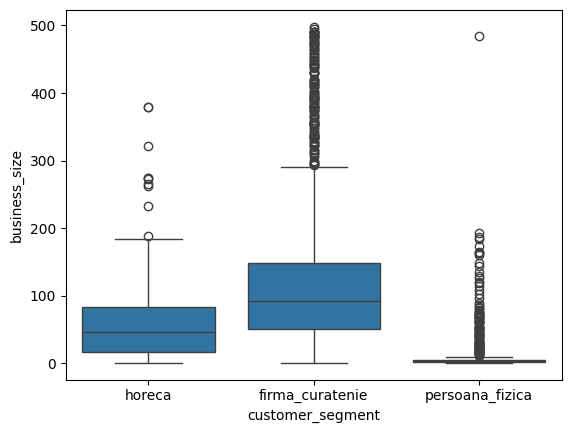

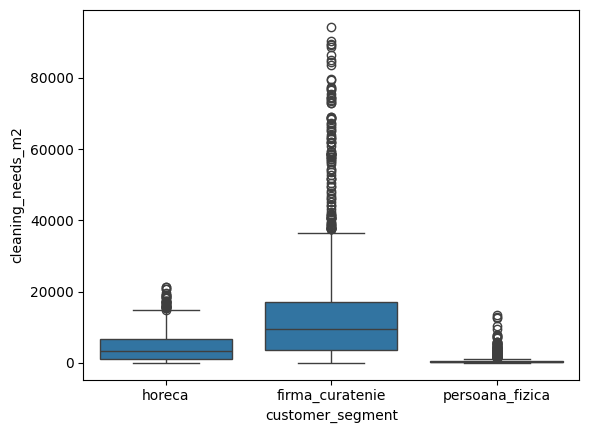

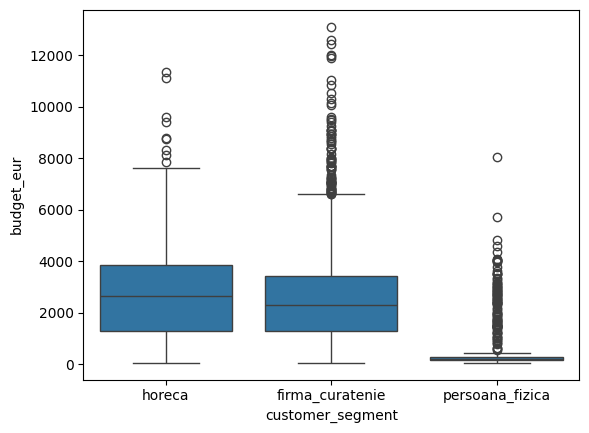

In [7]:
numeric_cols= df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  sns.boxplot(x= 'customer_segment', y= col, data= df)
  plt.show()

In [8]:
categorical_cols = df.select_dtypes(include = 'object').columns.drop('customer_segment')

model de clasificare
